In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [133]:
data = pd.read_csv('C://Users//А4//projects//Projects//module_4//data project 4.csv')
data.sample(5)

,flight_id,flight_no,departure_airport,arrival_airport,model,actual_departure,actual_arrival,range,total_amount,count_seat_economy,count_seat_business,total_amount_business
95,136533,PG0194,AAQ,NOZ,Boeing 737-300,2016-12-13T06:13:00Z,2016-12-13T11:16:00Z,4200,NaN,118,12,NaN
147,136774,PG0480,AAQ,EGO,Sukhoi Superjet-100,2016-12-02T09:27:00Z,2016-12-02T10:17:00Z,3000,740100.0,85,12,226800.0
138,136742,PG0480,AAQ,EGO,Sukhoi Superjet-100,2016-12-18T09:27:00Z,2016-12-18T10:17:00Z,3000,765300.0,85,12,226800.0
177,136887,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-01-20T09:30:00Z,2017-01-20T10:19:00Z,3000,595200.0,85,12,151200.0
179,136900,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-02-01T09:30:00Z,2017-02-01T10:21:00Z,3000,765300.0,85,12,226800.0


In [134]:
data.describe()

,flight_id,range,total_amount,count_seat_economy,count_seat_business,total_amount_business
count,193.000000,193.000000,1.800000e+02,193.000000,193.0,180.000000
mean,136540.466321,3640.414508,1.179647e+06,102.611399,12.0,297346.666667
std,249.389171,600.194269,4.811836e+05,16.505342,0.0,96237.646613
min,136119.000000,3000.000000,5.310000e+05,85.000000,12.0,113400.000000
25%,136320.000000,3000.000000,7.385250e+05,85.000000,12.0,226800.000000
50%,136534.000000,4200.000000,1.068850e+06,118.000000,12.0,226800.000000
75%,136768.000000,4200.000000,1.631950e+06,118.000000,12.0,402600.000000
max,136961.000000,4200.000000,1.886000e+06,118.000000,12.0,439200.000000


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   flight_id              193 non-null    int64  
 1   flight_no              193 non-null    object 
 2   departure_airport      193 non-null    object 
 3   arrival_airport        193 non-null    object 
 4   model                  193 non-null    object 
 5   actual_departure       193 non-null    object 
 6   actual_arrival         193 non-null    object 
 7   range                  193 non-null    int64  
 8   total_amount           180 non-null    float64
 9   count_seat_economy     193 non-null    int64  
 10  count_seat_business    193 non-null    int64  
 11  total_amount_business  180 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 18.2+ KB


In [136]:
# при просмотре таблицы видно, что для Новокузнецка нет данных total_amount
pd.isnull(data).sum()

flight_id                 0
flight_no                 0
departure_airport         0
arrival_airport           0
model                     0
actual_departure          0
actual_arrival            0
range                     0
total_amount             13
count_seat_economy        0
count_seat_business       0
total_amount_business    13
dtype: int64

In [137]:
# удаляем строки с нулевым значением в столбце total_amount
data1 = data.dropna(subset=['total_amount'])
pd.isnull(data1).sum()

flight_id                0
flight_no                0
departure_airport        0
arrival_airport          0
model                    0
actual_departure         0
actual_arrival           0
range                    0
total_amount             0
count_seat_economy       0
count_seat_business      0
total_amount_business    0
dtype: int64

In [138]:
data1.pop('range')
data1.head(5)

,flight_id,flight_no,departure_airport,arrival_airport,model,actual_departure,actual_arrival,total_amount,count_seat_economy,count_seat_business,total_amount_business
0,136119,PG0252,AAQ,SVO,Boeing 737-300,2017-01-03T10:08:00Z,2017-01-03T11:49:00Z,1653000.0,118,12,402600.0
1,136120,PG0252,AAQ,SVO,Boeing 737-300,2017-02-24T10:07:00Z,2017-02-24T11:46:00Z,1605400.0,118,12,402600.0
2,136122,PG0252,AAQ,SVO,Boeing 737-300,2017-01-08T10:08:00Z,2017-01-08T11:48:00Z,1431000.0,118,12,366000.0
3,136130,PG0252,AAQ,SVO,Boeing 737-300,2017-02-13T10:07:00Z,2017-02-13T11:46:00Z,1556600.0,118,12,366000.0
4,136131,PG0252,AAQ,SVO,Boeing 737-300,2017-01-28T10:07:00Z,2017-01-28T11:46:00Z,1812800.0,118,12,439200.0


In [139]:
# Предположим, что Цена авиационного топлива за тонну 2017
# https://regionneftesbit.ru/cena-aviacionnogo-topliva-za-tonnu-2017/
# 37 рублей за 1 кг или 37000 рублей за тонну   
# Цену в модели можно уточнить, если найдется дополнение

In [140]:
id_list = ["37000"]
data1['fuel_cost'] = np.repeat(id_list, 180)
data1.head(2)

<ipython-input-140-3cd300852c5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['fuel_cost'] = np.repeat(id_list, 180)


,flight_id,flight_no,departure_airport,arrival_airport,model,actual_departure,actual_arrival,total_amount,count_seat_economy,count_seat_business,total_amount_business,fuel_cost
0,136119,PG0252,AAQ,SVO,Boeing 737-300,2017-01-03T10:08:00Z,2017-01-03T11:49:00Z,1653000.0,118,12,402600.0,37000
1,136120,PG0252,AAQ,SVO,Boeing 737-300,2017-02-24T10:07:00Z,2017-02-24T11:46:00Z,1605400.0,118,12,402600.0,37000


In [141]:
# преобразуем столбец fuel_cost в числовой формат 
data1['fuel_cost'] = data1['fuel_cost'].apply(pd.to_numeric)

<ipython-input-141-c61c7a9bc8b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['fuel_cost'] = data1['fuel_cost'].apply(pd.to_numeric)


In [142]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 192
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   flight_id              180 non-null    int64  
 1   flight_no              180 non-null    object 
 2   departure_airport      180 non-null    object 
 3   arrival_airport        180 non-null    object 
 4   model                  180 non-null    object 
 5   actual_departure       180 non-null    object 
 6   actual_arrival         180 non-null    object 
 7   total_amount           180 non-null    float64
 8   count_seat_economy     180 non-null    int64  
 9   count_seat_business    180 non-null    int64  
 10  total_amount_business  180 non-null    float64
 11  fuel_cost              180 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 18.3+ KB


In [143]:
# Для SSJ, минимальный часовой расход обеспечивается на М = 0.75, а вот минимальный километровый — на М = 0.78…0.79. 
# http://superjet.wikidot.com/wiki:rashod-topliva
# https://aviation21.ru/sukhoj-superjet-100/
# Итого, за январь 
# Sukhoi Superjet-100: 1670 кг/ч
# Boeing 737-300: 2600 кг/ч

In [144]:
def fuel_in_hour(row):
    if row.model == 'Sukhoi Superjet-100':
        row.fuel_hour = 1.670
        return row
    else:      # Boeing 737-300
        row.fuel_hour = 2.600
        return row
data1['fuel_hour'] = 0
data1 = data1.apply(lambda row: fuel_in_hour(row), axis=1)
data1.sample(5)

<ipython-input-144-57d7ae70fcf0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['fuel_hour'] = 0


,flight_id,flight_no,departure_airport,arrival_airport,model,actual_departure,actual_arrival,total_amount,count_seat_economy,count_seat_business,total_amount_business,fuel_cost,fuel_hour
134,136725,PG0480,AAQ,EGO,Sukhoi Superjet-100,2016-12-19T09:30:00Z,2016-12-19T10:19:00Z,696000.0,85,12,170100.0,37000,1.67
154,136801,PG0480,AAQ,EGO,Sukhoi Superjet-100,2016-12-30T09:28:00Z,2016-12-30T10:18:00Z,765300.0,85,12,226800.0,37000,1.67
143,136767,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-01-23T09:27:00Z,2017-01-23T10:18:00Z,651300.0,85,12,189000.0,37000,1.67
176,136886,PG0480,AAQ,EGO,Sukhoi Superjet-100,2016-12-16T09:26:00Z,2016-12-16T10:16:00Z,721200.0,85,12,226800.0,37000,1.67
30,136253,PG0252,AAQ,SVO,Boeing 737-300,2016-12-24T10:08:00Z,2016-12-24T11:46:00Z,1407800.0,118,12,402600.0,37000,2.60


In [145]:
import datetime
data1['actual_departure'] = pd.to_datetime(data1['actual_departure'])
data1['actual_arrival'] = pd.to_datetime(data1['actual_arrival'])
data1.sample(5)

,flight_id,flight_no,departure_airport,arrival_airport,model,actual_departure,actual_arrival,total_amount,count_seat_economy,count_seat_business,total_amount_business,fuel_cost,fuel_hour
23,136215,PG0252,AAQ,SVO,Boeing 737-300,2017-02-28 10:09:00+00:00,2017-02-28 11:49:00+00:00,1664000.0,118,12,402600.0,37000,2.60
57,136360,PG0252,AAQ,SVO,Boeing 737-300,2017-02-05 10:08:00+00:00,2017-02-05 11:48:00+00:00,1455400.0,118,12,402600.0,37000,2.60
43,136296,PG0252,AAQ,SVO,Boeing 737-300,2016-12-29 10:07:00+00:00,2016-12-29 11:46:00+00:00,1678600.0,118,12,366000.0,37000,2.60
153,136800,PG0480,AAQ,EGO,Sukhoi Superjet-100,2016-12-09 09:27:00+00:00,2016-12-09 10:18:00+00:00,645000.0,85,12,189000.0,37000,1.67
109,136612,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-02-21 09:27:00+00:00,2017-02-21 10:17:00+00:00,746400.0,85,12,226800.0,37000,1.67


In [146]:
# Вычисляем разницу времени прибытия и времени отправления
data1['fly_hours'] = data1['actual_arrival'] - data1['actual_departure']
data1.info()           

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 192
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   flight_id              180 non-null    int64              
 1   flight_no              180 non-null    object             
 2   departure_airport      180 non-null    object             
 3   arrival_airport        180 non-null    object             
 4   model                  180 non-null    object             
 5   actual_departure       180 non-null    datetime64[ns, UTC]
 6   actual_arrival         180 non-null    datetime64[ns, UTC]
 7   total_amount           180 non-null    float64            
 8   count_seat_economy     180 non-null    int64              
 9   count_seat_business    180 non-null    int64              
 10  total_amount_business  180 non-null    float64            
 11  fuel_cost              180 non-null    int64              

In [147]:
data1['fly_hours'] = round(((data1['fly_hours'].dt.total_seconds())/3600),3)
data1.sample(5)

,flight_id,flight_no,departure_airport,arrival_airport,model,actual_departure,actual_arrival,total_amount,count_seat_economy,count_seat_business,total_amount_business,fuel_cost,fuel_hour,fly_hours
73,136436,PG0252,AAQ,SVO,Boeing 737-300,2017-01-26 10:08:00+00:00,2017-01-26 11:47:00+00:00,1811600.0,118,12,439200.0,37000,2.60,1.650
16,136185,PG0252,AAQ,SVO,Boeing 737-300,2017-01-14 10:06:00+00:00,2017-01-14 11:49:00+00:00,1520000.0,118,12,366000.0,37000,2.60,1.717
4,136131,PG0252,AAQ,SVO,Boeing 737-300,2017-01-28 10:07:00+00:00,2017-01-28 11:46:00+00:00,1812800.0,118,12,439200.0,37000,2.60,1.650
30,136253,PG0252,AAQ,SVO,Boeing 737-300,2016-12-24 10:08:00+00:00,2016-12-24 11:46:00+00:00,1407800.0,118,12,402600.0,37000,2.60,1.633
108,136609,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-01-08 09:28:00+00:00,2017-01-08 10:18:00+00:00,639300.0,85,12,189000.0,37000,1.67,0.833


In [148]:
# Умножаем время в полете на расход топлива в тоннах и цену за тонну в 2017 году
data1['money_for_fuel'] = data1['fly_hours'] * data1['fuel_hour'] * data1['fuel_cost']
data1.sample(3)

,flight_id,flight_no,departure_airport,arrival_airport,model,actual_departure,actual_arrival,total_amount,count_seat_economy,count_seat_business,total_amount_business,fuel_cost,fuel_hour,fly_hours,money_for_fuel
79,136458,PG0252,AAQ,SVO,Boeing 737-300,2017-01-02 10:07:00+00:00,2017-01-02 11:46:00+00:00,1568800.0,118,12,329400.0,37000,2.60,1.650,158730.00
104,136586,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-01-10 09:28:00+00:00,2017-01-10 10:18:00+00:00,759000.0,85,12,226800.0,37000,1.67,0.833,51471.07
33,136264,PG0252,AAQ,SVO,Boeing 737-300,2017-02-18 10:07:00+00:00,2017-02-18 11:47:00+00:00,1690800.0,118,12,402600.0,37000,2.60,1.667,160365.40


In [149]:
# Считаем разницу между стоимсотью проданных билетов и расходами на топливо
data1['profit1'] = data1['total_amount'] - data1['money_for_fuel']
data1.sample(5)

,flight_id,flight_no,departure_airport,arrival_airport,model,actual_departure,actual_arrival,total_amount,count_seat_economy,count_seat_business,total_amount_business,fuel_cost,fuel_hour,fly_hours,money_for_fuel,profit1
28,136250,PG0252,AAQ,SVO,Boeing 737-300,2017-02-08 10:06:00+00:00,2017-02-08 11:47:00+00:00,1407800.0,118,12,292800.0,37000,2.60,1.683,161904.60,1245895.40
161,136827,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-02-18 09:26:00+00:00,2017-02-18 10:17:00+00:00,765300.0,85,12,226800.0,37000,1.67,0.850,52521.50,712778.50
127,136688,PG0480,AAQ,EGO,Sukhoi Superjet-100,2016-12-15 09:30:00+00:00,2016-12-15 10:20:00+00:00,689700.0,85,12,189000.0,37000,1.67,0.833,51471.07,638228.93
177,136887,PG0480,AAQ,EGO,Sukhoi Superjet-100,2017-01-20 09:30:00+00:00,2017-01-20 10:19:00+00:00,595200.0,85,12,151200.0,37000,1.67,0.817,50482.43,544717.57
3,136130,PG0252,AAQ,SVO,Boeing 737-300,2017-02-13 10:07:00+00:00,2017-02-13 11:46:00+00:00,1556600.0,118,12,366000.0,37000,2.60,1.650,158730.00,1397870.00


In [150]:
# удалил столбцы datetime64, т.к. не сохранялось в эксель 
data2 = data1.drop(['actual_departure', 'actual_arrival'], axis=1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 192
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   flight_id              180 non-null    int64  
 1   flight_no              180 non-null    object 
 2   departure_airport      180 non-null    object 
 3   arrival_airport        180 non-null    object 
 4   model                  180 non-null    object 
 5   total_amount           180 non-null    float64
 6   count_seat_economy     180 non-null    int64  
 7   count_seat_business    180 non-null    int64  
 8   total_amount_business  180 non-null    float64
 9   fuel_cost              180 non-null    int64  
 10  fuel_hour              180 non-null    float64
 11  fly_hours              180 non-null    float64
 12  money_for_fuel         180 non-null    float64
 13  profit1                180 non-null    float64
dtypes: float64(6), int64(4), object(4)
memory usage: 21.1+ KB


In [158]:
# create excel writer object 
writer = pd.ExcelWriter('project4_profit.xlsx') 
# write dataframe to excel 
data2.to_excel(writer) 
# save the excel 
writer.save() 
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


In [153]:
# создаем категоральный признак модель самолета
data3 = pd.get_dummies(data1, columns=["model"])
data3.sample(2)

,flight_id,flight_no,departure_airport,arrival_airport,actual_departure,actual_arrival,total_amount,count_seat_economy,count_seat_business,total_amount_business,fuel_cost,fuel_hour,fly_hours,money_for_fuel,profit1,model_Boeing 737-300,model_Sukhoi Superjet-100
117,136649,PG0480,AAQ,EGO,2017-01-18 09:25:00+00:00,2017-01-18 10:15:00+00:00,759000.0,85,12,226800.0,37000,1.67,0.833,51471.07,707528.93,0,1
42,136293,PG0252,AAQ,SVO,2017-01-23 10:09:00+00:00,2017-01-23 11:48:00+00:00,1689600.0,118,12,439200.0,37000,2.60,1.650,158730.00,1530870.00,1,0


In [154]:
# создаем категоральный признак аэропорты назначения
data4 = pd.get_dummies(data3, columns=["arrival_airport"])
data4.sample(2)

,flight_id,flight_no,departure_airport,actual_departure,actual_arrival,total_amount,count_seat_economy,count_seat_business,total_amount_business,fuel_cost,fuel_hour,fly_hours,money_for_fuel,profit1,model_Boeing 737-300,model_Sukhoi Superjet-100,arrival_airport_EGO,arrival_airport_SVO
112,136630,PG0480,AAQ,2017-02-25 09:32:00+00:00,2017-02-25 10:22:00+00:00,746400.0,85,12,226800.0,37000,1.67,0.833,51471.07,694928.93,0,1,1,0
80,136463,PG0252,AAQ,2017-01-20 10:06:00+00:00,2017-01-20 11:45:00+00:00,1788400.0,118,12,439200.0,37000,2.60,1.650,158730.00,1629670.00,1,0,0,1


In [155]:
# Удаляем стобцы object и datetime64
data4 = data4.drop(['flight_no', 'departure_airport','actual_departure','actual_arrival'], axis=1)
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 192
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   flight_id                  180 non-null    int64  
 1   total_amount               180 non-null    float64
 2   count_seat_economy         180 non-null    int64  
 3   count_seat_business        180 non-null    int64  
 4   total_amount_business      180 non-null    float64
 5   fuel_cost                  180 non-null    int64  
 6   fuel_hour                  180 non-null    float64
 7   fly_hours                  180 non-null    float64
 8   money_for_fuel             180 non-null    float64
 9   profit1                    180 non-null    float64
 10  model_Boeing 737-300       180 non-null    uint8  
 11  model_Sukhoi Superjet-100  180 non-null    uint8  
 12  arrival_airport_EGO        180 non-null    uint8  
 13  arrival_airport_SVO        180 non-null    uint8  

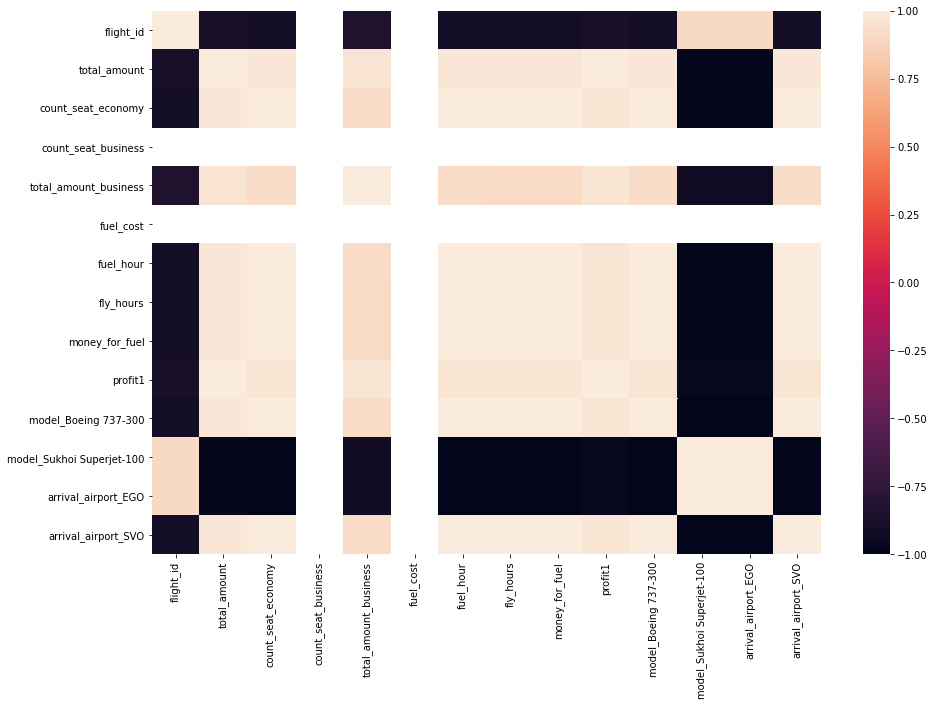

In [156]:
# строим корреляцию признаков
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data4.corr(),)

In [157]:
corr_matrix = data4.corr(method='pearson')
corr_matrix

,flight_id,total_amount,count_seat_economy,count_seat_business,total_amount_business,fuel_cost,fuel_hour,fly_hours,money_for_fuel,profit1,model_Boeing 737-300,model_Sukhoi Superjet-100,arrival_airport_EGO,arrival_airport_SVO
flight_id,1.000000,-0.876172,-0.904781,NaN,-0.841798,NaN,-0.904781,-0.903672,-0.904185,-0.869147,-0.904781,0.904781,0.904781,-0.904781
total_amount,-0.876172,1.000000,0.973753,NaN,0.959668,NaN,0.973753,0.971910,0.972487,0.999560,0.973753,-0.973753,-0.973753,0.973753
count_seat_economy,-0.904781,0.973753,1.000000,NaN,0.914522,NaN,1.000000,0.999434,0.999742,0.966600,1.000000,-1.000000,-1.000000,1.000000
count_seat_business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_amount_business,-0.841798,0.959668,0.914522,NaN,1.000000,NaN,0.914522,0.911092,0.912051,0.961948,0.914522,-0.914522,-0.914522,0.914522
fuel_cost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_hour,-0.904781,0.973753,1.000000,NaN,0.914522,NaN,1.000000,0.999434,0.999742,0.966600,1.000000,-1.000000,-1.000000,1.000000
fly_hours,-0.903672,0.971910,0.999434,NaN,0.911092,NaN,0.999434,1.000000,0.999929,0.964506,0.999434,-0.999434,-0.999434,0.999434
money_for_fuel,-0.904185,0.972487,0.999742,NaN,0.912051,NaN,0.999742,0.999929,1.000000,0.965145,0.999742,-0.999742,-0.999742,0.999742
profit1,-0.869147,0.999560,0.966600,NaN,0.961948,NaN,0.966600,0.964506,0.965145,1.000000,0.966600,-0.966600,-0.966600,0.966600


In [ ]:
# Построить графикики как в эксель средствами питон